In [1]:
import numpy as np
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt
from bksvd import MB_BKSVD4SD, Normaliza
from utils import od2rgb


# BKSVD: Python Implementation

This repository contains a Python implementation of the "Bayesian K-SVD for H and E blind color deconvolution" (BKSVD) algorithm. The original MATLAB code was developed by Fernando Pérez-Bueno et al. and is available [here](https://github.com/vipgugr/BKSVD).

This project provides tools for stain separation and image normalization in histological image analysis, as described in the original publication:


> Pérez-Bueno, F., Serra, J. G., Vega, M., Mateos, J., Molina, R., & Katsaggelos, A. K. (2022). Bayesian K-SVD for H and E blind color deconvolution. Applications to stain normalization, data augmentation and cancer classification. *Computerized Medical Imaging and Graphics*, *95*, 102048. https://doi.org/10.1016/j.compmedimag.2022.102048

## Original Project

The original MATLAB code and data can be found at: [https://github.com/vipgugr/BKSVD](https://github.com/vipgugr/BKSVD)

## Requirements

The required Python packages are listed in the `requirements.txt` file. You can install them using pip:

```bash
pip install -r requirements.txt
```

## Usage

This repository includes a jupyter notebook `Example.ipynb` that shows the basic usage for this code. 

It is also possible to run the example by executing the `main.py` script:

```bash
python main.py
```

This will process the sample images in the `data` directory and display the original and normalized images using `matplotlib`.

## Data
The data included in this repo is a small sample to provide an example. Please notice that the patches have a very low quality and present jpg artifacts. We recommend to explore the algorithm using your own data.

## License

This project is licensed under the MIT License.

## Citation

If you use this code in your research, please cite the original paper:

```
@article{PEREZBUENO2022102048,
title = {Bayesian K-SVD for H and E blind color deconvolution. Applications to stain normalization, data augmentation and cancer classification},
journal = {Computerized Medical Imaging and Graphics},
pages = {102048},
year = {2022},
issn = {0895-6111},
doi = {https://doi.org/10.1016/j.compmedimag.2022.102048},
url = {https://www.sciencedirect.com/science/article/pii/S0895611122000210},
author = {Fernando Pérez-Bueno and Juan G. Serra and Miguel Vega and Javier Mateos and Rafael Molina and Aggelos K. Katsaggelos},
keywords = {Bayesian modelling, Histological images, Blind Color Deconvolution, Stain Normalization}
}
```

## IA disclaimer

IA has been used to generate this code from the original MATLAB implementation. Notice that this is still under review and might contain errors or not reproduce exactly the same implementation as explained in the paper. Use it with caution.

- BKSVD - batch: 1 - iter: 101 of 100
- BKSVD - batch: 2 - iter: 101 of 100
- BKSVD - batch: 3 - iter: 101 of 100
- BKSVD - batch: 4 - iter: 101 of 100
- BKSVD - batch: 5 - iter: 101 of 100
- BKSVD - batch: 6 - iter: 101 of 100
- BKSVD - batch: 7 - iter: 101 of 100
- BKSVD - batch: 8 - iter: 101 of 100
- BKSVD - batch: 9 - iter: 101 of 100
- BKSVD - batch: 10 - iter: 101 of 100


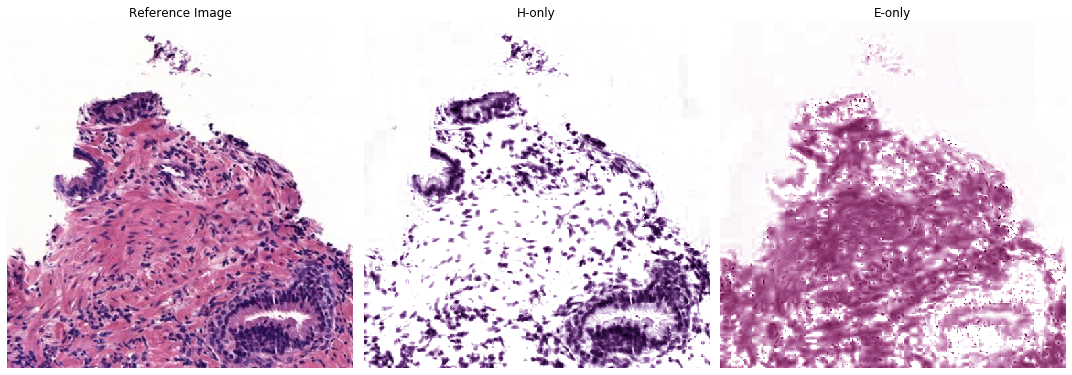

In [20]:

# Params
ns = 2
max_iter = 100
batch_size = 1000
n_batches = 10

# Initial reference matrix
mat_data = scipy.io.loadmat('data/MLandini.mat')
RM = mat_data['RM']
D0 = RM[:, :ns]

# Reference Image
I_ref = Image.open('data/Reference.jpg')
Mref, Cref = MB_BKSVD4SD(I_ref, D0, ns)
Cref_Rmax = np.percentile(Cref, 99, axis=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
stain_titles = ['H-only', 'E-only']

axes[0].imshow(I)
axes[0].set_title(f'Reference Image')
axes[0].axis('off')

for s in range(2):
    stain_separated = np.matmul(Mref[:,s:s+1], Cref[s:s+1,:])
    stain_2D = stain_separated.T.reshape(m,n,3)
    stain_2D = od2rgb(stain_2D)

    axes[1+s].imshow(stain_2D)
    axes[1+s].set_title(stain_titles[s])
    axes[1+s].axis('off')

plt.tight_layout()
plt.show()

- BKSVD - batch: 1 - iter: 101 of 100
- BKSVD - batch: 2 - iter: 101 of 100
- BKSVD - batch: 3 - iter: 101 of 100
- BKSVD - batch: 4 - iter: 101 of 100
- BKSVD - batch: 5 - iter: 101 of 100
- BKSVD - batch: 6 - iter: 101 of 100
- BKSVD - batch: 7 - iter: 101 of 100
- BKSVD - batch: 8 - iter: 101 of 100
- BKSVD - batch: 9 - iter: 101 of 100
- BKSVD - batch: 10 - iter: 101 of 100
- BKSVD - batch: 1 - iter: 101 of 100
- BKSVD - batch: 2 - iter: 101 of 100
- BKSVD - batch: 3 - iter: 101 of 100
- BKSVD - batch: 4 - iter: 101 of 100
- BKSVD - batch: 5 - iter: 101 of 100
- BKSVD - batch: 6 - iter: 101 of 100
- BKSVD - batch: 7 - iter: 101 of 100
- BKSVD - batch: 8 - iter: 101 of 100
- BKSVD - batch: 9 - iter: 101 of 100
- BKSVD - batch: 10 - iter: 101 of 100
- BKSVD - batch: 1 - iter: 101 of 100
- BKSVD - batch: 2 - iter: 101 of 100
- BKSVD - batch: 3 - iter: 101 of 100
- BKSVD - batch: 4 - iter: 101 of 100
- BKSVD - batch: 5 - iter: 101 of 100
- BKSVD - batch: 6 - iter: 101 of 100
- BKSVD - 

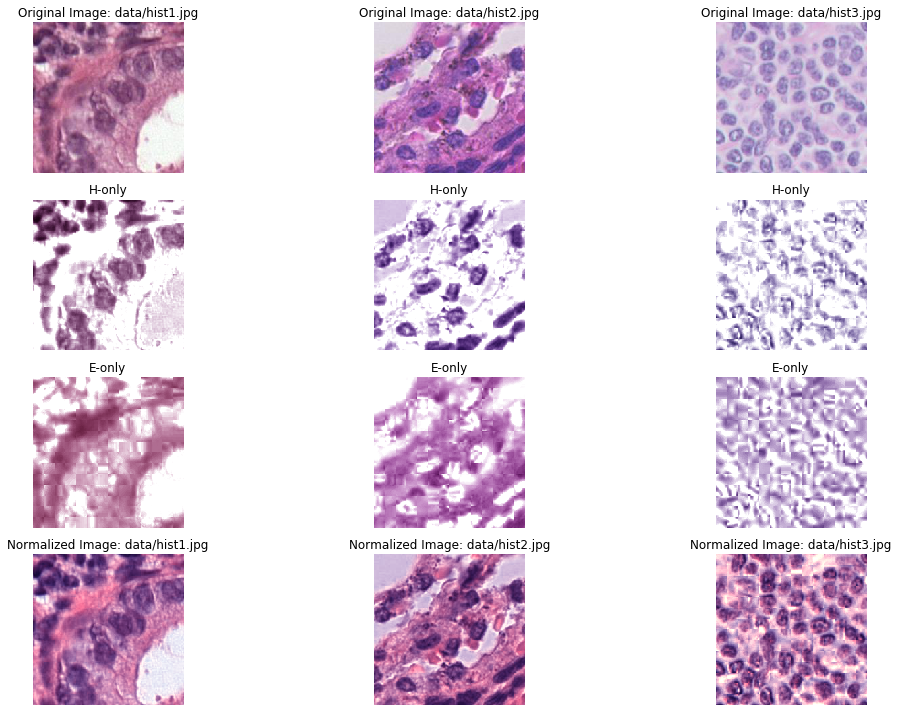

In [21]:
# Images to process
Images = ['data/hist1.jpg', 'data/hist2.jpg', 'data/hist3.jpg']
neg2cero = False

fig, axes = plt.subplots(4, len(Images), figsize=(15, 10))

stain_titles = ['H-only', 'E-only']

for i, img_path in enumerate(Images[:]):
    I = Image.open(img_path)
    m, n, c = np.array(I).shape
    M, C = MB_BKSVD4SD(I, D0, ns)
    C_Rmax = np.percentile(C, 99, axis=1)
    norm_fac = Cref_Rmax / C_Rmax
    Irec_norm, _ = Normaliza(Mref, C, M, neg2cero, norm_fac)
    Irec_norm = np.clip(Irec_norm, 0, 255).astype(np.uint8)

    axes[0, i].imshow(I)
    axes[0, i].set_title(f'Original Image: {img_path}')
    axes[0, i].axis('off')

    axes[3, i].imshow(Irec_norm)
    axes[3, i].set_title(f'Normalized Image: {img_path}')
    axes[3, i].axis('off')
    
    for s in range(2):
        stain_separated = np.matmul(M[:,s:s+1], C[s:s+1,:])
        stain_2D = stain_separated.T.reshape(m,n,3)
        stain_2D = od2rgb(stain_2D)

        axes[1+s, i].imshow(stain_2D)
        axes[1+s, i].set_title(stain_titles[s])
        axes[1+s, i].axis('off')

plt.tight_layout()
plt.show()

